# Задание

изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

Постройте график по числу поездок по дате и времени.

Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.

Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.

Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.

Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
london = pd.read_csv('D://KARPOV/london.csv', parse_dates=['timestamp'])

In [3]:
#Смотрим данные
london.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [4]:
london.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [5]:
london.shape

(17414, 10)

In [6]:
#null-значений нет
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

по оси x – дата (timestamp)
по оси y – число поездок (cnt)
Выберите верные утверждения:

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

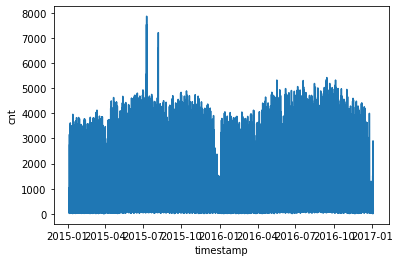

In [7]:
sns.lineplot(x='timestamp', y='cnt', data=london)

Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

In [8]:
london_agg = london.set_index('timestamp').resample(rule='D').agg({'cnt':'sum'})

<AxesSubplot:xlabel='timestamp'>

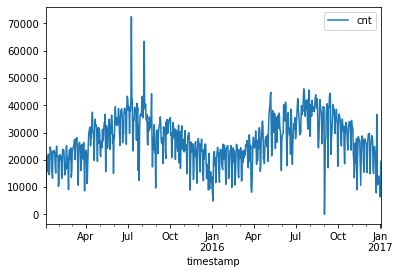

In [9]:
london.set_index('timestamp').resample(rule='D').agg({'cnt':'sum'}).plot()

#Встречаются как очень резкие скачки числа аренд, так и падения
#Зимой число аренд меньше, чем летом
#Максимальное число аренд за день составляет более 70 000

Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔.

Для этого разделим дальнейшие действия на несколько этапов:

сначала посчитаем скользящее среднее, чтобы сгладить ряд

далее – разницу между наблюдаемыми и сглаженными значениями

определим верхние и нижние границы 99% доверительного интервала 
найдем причины аномалий!

На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [10]:
london_agg = london_agg.reset_index()


In [11]:
london_agg['rolling']=london_agg.cnt.rolling(window=3).mean()

In [12]:
london_agg['difference']=london_agg['cnt'] - london_agg['rolling']

In [13]:
london_agg.query('timestamp == "2015-07-09"')

,timestamp,cnt,rolling,difference
186,2015-07-09,72504,50705.0,21799.0


Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. Например:

c = a - b
std = np.std(c)

В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [14]:
round(np.std(london_agg.difference), 2)

4558.59

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

upper_bound – верхняя граница; к средним прибавляем 2.576∗std
lower_bound – нижняя граница; вычитаем 2.576∗std
Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

Note: в качестве std нужно брать стандартное отклонение без округления.

Note 2: вам может понадобиться убрать даты из индекса - иногда из-за этого колонки могут не присваиваться в датафрейм. Вам пригодится .reset_index().

In [15]:
london_agg['upper_bond'] = london_agg['rolling'] + np.std(london_agg.difference) * 2.576
london_agg['lower_bond'] = london_agg['rolling'] - np.std(london_agg.difference) * 2.576

In [16]:
london_agg.tail(1).round(2)

,timestamp,cnt,rolling,difference,upper_bond,lower_bond
730,2017-01-03,19436,12560.0,6876.0,24302.92,817.08


И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [17]:
london_agg['anomaly_upper'] = london_agg['upper_bond'] < london_agg['cnt'] 

In [18]:
#имеется 4 аномалии
london_agg.anomaly_upper.value_counts()

False    727
True       4
Name: anomaly_upper, dtype: int64

In [19]:
#Наибольший скачок (аномалия) наблюдается 2015-07-09
london_agg.loc[london_agg['upper_bond'] < london_agg['cnt']].sort_values('cnt', ascending=False)

,timestamp,cnt,rolling,difference,upper_bond,lower_bond,anomaly_upper
186,2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812,True
214,2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146,True
721,2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479,True
609,2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812,True


Подумайте, в чем может быть причина столь высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверить наличие ошибок в данных (повторяющихся строк), а также использовать поиск Google. 

In [20]:
#Посмотрим сначала на дату и характеристики того дня
#Летняя ясная погода 16 градусов тепла, не выходной, не праздник
london.query('timestamp == "2015-07-09"')
#поиск подсказал, что были забастовки работников метро в Лондоне в тот день из-за недовольства заработной платой

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
4453,2015-07-09,400,16.0,16.0,55.0,14.0,1.0,0.0,0.0,1.0


Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. 
В чем может быть причина падения числа аренд 2016-09-02?

In [21]:
london_agg['anomaly_lower'] = london_agg['lower_bond'] > london_agg['cnt'] 
london_agg.loc[london_agg['lower_bond'] > london_agg['cnt']].sort_values('cnt', ascending=True)

,timestamp,cnt,rolling,difference,upper_bond,lower_bond,anomaly_upper,anomaly_lower
607,2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146,False,True
314,2015-11-14,8898,21037.333333,-12139.333333,32780.252521,9294.414146,False,True
678,2016-11-12,8990,20878.000000,-11888.000000,32620.919188,9135.080812,False,True
130,2015-05-14,15609,28709.333333,-13100.333333,40452.252521,16966.414146,False,True
201,2015-07-24,16034,31013.666667,-14979.666667,42756.585854,19270.747479,False,True
615,2016-09-10,17080,31262.000000,-14182.000000,43004.919188,19519.080812,False,True
232,2015-08-24,17400,29529.333333,-12129.333333,41272.252521,17786.414146,False,True
621,2016-09-16,21967,36193.333333,-14226.333333,47936.252521,24450.414146,False,True
189,2015-07-12,23240,36036.666667,-12796.666667,47779.585854,24293.747479,False,True


In [31]:
#Любая другая дата работает, а нужная нам выдает пустую строку. Вывод - ошибка при сборе данных
london.query('timestamp == "2016-09-02"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
